In [3]:
import pandas as pd
import datetime
import numpy as np

In [4]:
df = pd.read_csv('taxi-fare.csv')
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1


In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) - datetime.timedelta(hours = 4) #for new york time
df['pickup_datetime']

0        2010-04-19 04:17:56+00:00
1        2010-04-17 11:43:53+00:00
2        2010-04-17 07:23:26+00:00
3        2010-04-11 17:25:03+00:00
4        2010-04-16 22:19:01+00:00
                    ...           
119995   2010-04-18 10:33:03+00:00
119996   2010-04-23 06:27:48+00:00
119997   2010-04-18 14:50:40+00:00
119998   2010-04-13 04:14:44+00:00
119999   2010-04-17 12:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [7]:
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Hours'] = df['pickup_datetime'].dt.hour
df['Minutes'] = df['pickup_datetime'].dt.minute
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 10:33:03+00:00,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,2010,4,18,10,33
119996,2010-04-23 06:27:48+00:00,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,2010,4,23,6,27
119997,2010-04-18 14:50:40+00:00,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,2010,4,18,14,50
119998,2010-04-13 04:14:44+00:00,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,2010,4,13,4,14


In [8]:
df['AMPM'] = np.where(df['Hours'] <12,0,1 )
df = df.drop('pickup_datetime',axis = 1)
df

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,AMPM
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,2010,4,18,10,33,0
119996,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,2010,4,23,6,27,0
119997,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,2010,4,18,14,50,1
119998,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,2010,4,13,4,14,0


# Haversine distances

In [9]:
import math
def haversine(df):
     
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(np.sin(dLat / 2), 2) + pow(np.sin(dLon / 2), 2) * np.cos(lat1) * np.cos(lat2));
    rad = 6371 #Radius of earth in kms
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return rad * c

In [10]:
df['Total_dist'] = haversine(df)
df

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,AMPM,Total_dist
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,2010,4,18,10,33,0,5.751348
119996,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,2010,4,23,6,27,0,5.767444
119997,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,2010,4,18,14,50,1,5.052523
119998,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,2010,4,13,4,14,0,1.208923


In [11]:
df = df.drop(['pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude'],axis = 1)
df

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,AMPM,Total_dist
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321
...,...,...,...,...,...,...,...,...,...,...
119995,15.3,1,1,2010,4,18,10,33,0,5.751348
119996,15.3,1,1,2010,4,23,6,27,0,5.767444
119997,12.5,1,3,2010,4,18,14,50,1,5.052523
119998,4.9,0,1,2010,4,13,4,14,0,1.208923


# Storing data in mongodb

In [26]:
import json
records = json.loads(df.T.to_json()).values()

In [33]:
import pymongo
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['newyorktaxi']
col = db['rides']

In [34]:
col

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'newyorktaxi'), 'rides')

In [35]:
col.insert_many(records)

# Regression

In [36]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

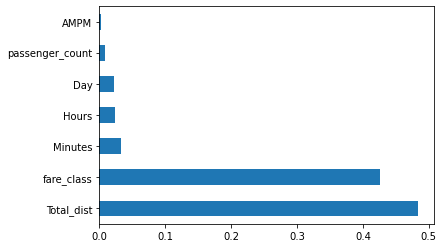

In [39]:
feature_imp = pd.Series(model.feature_importances_ , index = x.columns)
feature_imp.nlargest(7).plot(kind = 'barh')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [42]:
import xgboost

In [43]:
regressor = xgboost.XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred = regressor.predict(x_test)
y_pred

array([ 4.633475 ,  5.733228 ,  8.599703 , ...,  7.6622825,  7.1971116,
       13.063603 ], dtype=float32)

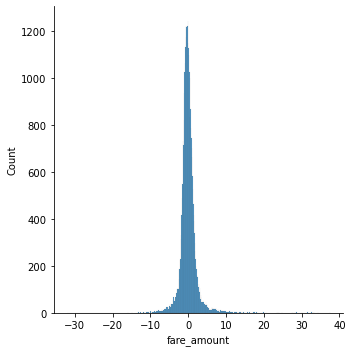

In [47]:
import seaborn as sns
sns.displot(y_test-y_pred)

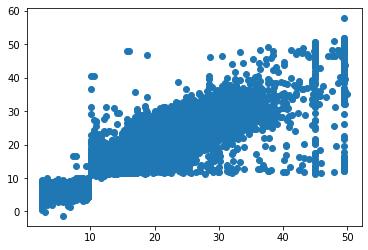

In [48]:
plt.scatter(y_test,y_pred)

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.4025255433477628
MSE: 6.6505615409924435
RMSE: 2.578868267475569


# Hyperparameter tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05','0.1','0.2','0.3','0.5','0.6']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample = [0.7,0.6,0.8]
min_child_weight = [3, 4, 5, 6, 7]

In [51]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [52]:
xgboost_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid
                               ,scoring='neg_mean_squared_error', n_iter = 5, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [53]:
xgboost_random.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 4.6min
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 4.6min
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 4.5min
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 4.8min
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 4.5min
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time= 3.0min
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time= 2.3min
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time= 2.8min
[CV] END learning_

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                          tree_method='exact',
                                          validate_parameters=1,
                   

In [54]:
xgboost_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 6,
 'max_depth': 25,
 'learning_rate': '0.05'}

In [55]:
y_pred = xgboost_random.predict(x_test)
y_pred

array([ 4.246757 ,  5.805538 ,  8.03885  , ...,  6.9955587,  7.067714 ,
       11.182132 ], dtype=float32)

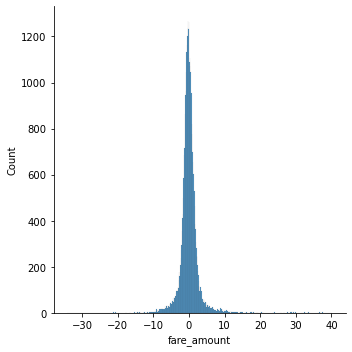

In [56]:
sns.displot(y_test-y_pred)

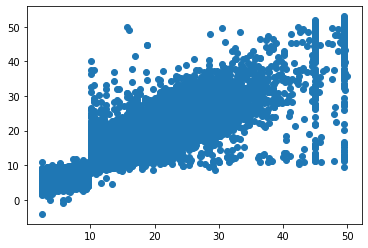

In [57]:
plt.scatter(y_test,y_pred)

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.58401330341383
MSE: 8.125437017099834
RMSE: 2.8505152195874754


# ANN

In [59]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [62]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers : 3 hidden layers with 256 nodes each
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer : don't used sigmoid as this is regression problem
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 20)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5628/5628 [==============================] - 16s 3ms/step - loss: 2.1921 - mean_absolute_error: 2.1921 

In [63]:
prediction = NN_model.predict(x_test)

c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

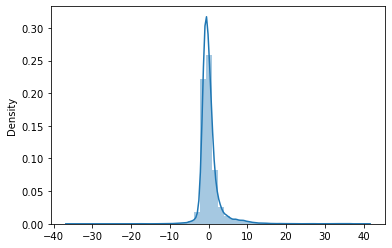

In [64]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

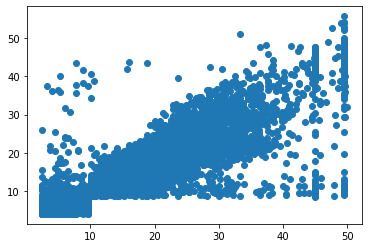

In [65]:
plt.scatter(y_test,prediction)

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.5414436198804113
MSE: 9.137758015405286
RMSE: 3.0228724775294915


# TPOTRegressor Automated Library

In [67]:
# Automated library that decides which regressor is the best
from tpot import TPOTRegressor

c:\users\ameya gupta\miniconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [ ]:
# regressor = TPOTRegressor()
# regressor.fit(x_train,y_train)

In [12]:
df

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,AMPM,Total_dist
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321
...,...,...,...,...,...,...,...,...,...,...
119995,15.3,1,1,2010,4,18,10,33,0,5.751348
119996,15.3,1,1,2010,4,23,6,27,0,5.767444
119997,12.5,1,3,2010,4,18,14,50,1,5.052523
119998,4.9,0,1,2010,4,13,4,14,0,1.208923


In [13]:
df.to_csv('FinalData.csv')